## Dies ist das Datenanalysedokument Für das Forschungseminar (Gruppe 4)

### Thema: Hat FoMO einen Einfluss auf ITID

### Herrangehensweise der Analyse: Regressions und Signifikanzanalyse

## Laden und Vorbereitung des Datensatzen

Importieren aller nötigen Datenbanken

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols


In [130]:
df = pd.read_csv("Data_FoMO_ITID.csv", encoding="utf-8")

Auswahl der für uns relevanten Spalten

In [131]:
df = df[[
    'A101_01', 'A101_02', 'A101_03', 'A101_04', 'A101_05', 'A101_06',
    'A101_07', 'A101_08', 'A101_09', 'A101_10', 'A102',
    'A201_01', 'A201_02', 'A201_03', 'A201_04', 'A201_05', 'A201_06',
    'A301', 'A302', 'A303', 'A304', 'A305', 'A306',
    'A403', 'A404', 'A405_01'
]]

SoSci Survey hat an manchenstellen anstatt eines Missing Value einen negativen Wert eingetragen diese filtern wir raus um keine verfällsten MIttelwerte zu erhalten 

In [132]:
a1_a2_cols = [col for col in df.columns if col.startswith('A1') or col.startswith('A2')]
df = df[df[a1_a2_cols].apply(lambda row: row.between(0, 8).all(), axis=1)]
df.shape

(79, 26)

Erstellung der Mittelwwerte für FoMO und ITID

In [133]:
a101_cols = [f'A101_{str(i).zfill(2)}' for i in range(1, 11)]
a201_cols = [f'A201_{str(i).zfill(2)}' for i in range(1, 7)]
df['Fomo'] = df[a101_cols].mean(axis=1)
df['ITID'] = df[a201_cols].mean(axis=1)

In [134]:
df=df[df['A102']==2]

## Generelle Analyse zu FoMO und ITID

Generelle analyse zu Fomo und ITID: Durchschnitt und Standartabweichung 

In [135]:
# Durchschnittliche FoMO
if 'Fomo' in df.columns:
    print(f"Durchschnittlicher FoMO-Wert: {df['Fomo'].mean():.2f}")
    print(f"FoMO-Standardabweichung: {df['Fomo'].std():.2f}")
    print()

# Durchschnittliche ITID
if 'ITID' in df.columns:
    print(f"Durchschnittlicher ITID-Wert: {df['ITID'].mean():.2f}")
    print(f"ITID-Standardabweichung: {df['ITID'].std():.2f}")
    print()

Durchschnittlicher FoMO-Wert: 3.80
FoMO-Standardabweichung: 0.92

Durchschnittlicher ITID-Wert: 3.57
ITID-Standardabweichung: 1.37



Visualisierung der Datenpunkte Fomo und ITID

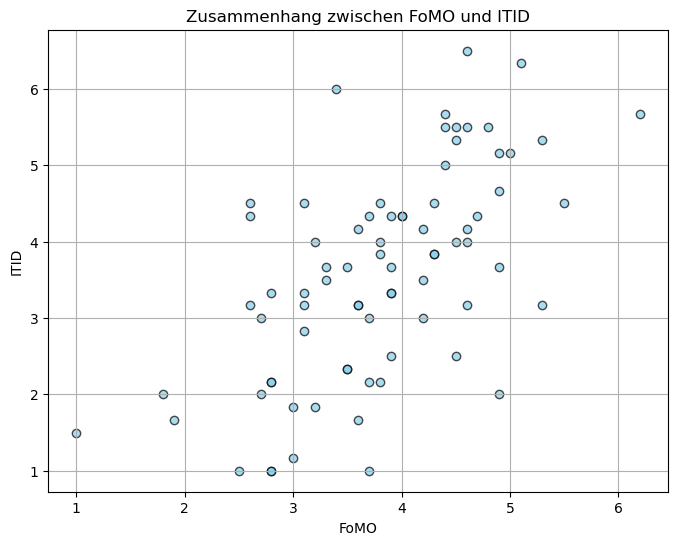

In [136]:
# Scatterplot von Fomo gegen ITID
plt.figure(figsize=(8, 6))
plt.scatter(df['Fomo'], df['ITID'], alpha=0.7, color='skyblue', edgecolor='black')

# Achsenbeschriftung und Titel
plt.xlabel('FoMO')
plt.ylabel('ITID')
plt.title('Zusammenhang zwischen FoMO und ITID')

# Gitterlinien und Anzeige
plt.grid(True)
plt.show()

Regressionsmodel Trainieren und eine Regressionsgrade ausrechenen sowie Visualiesieren

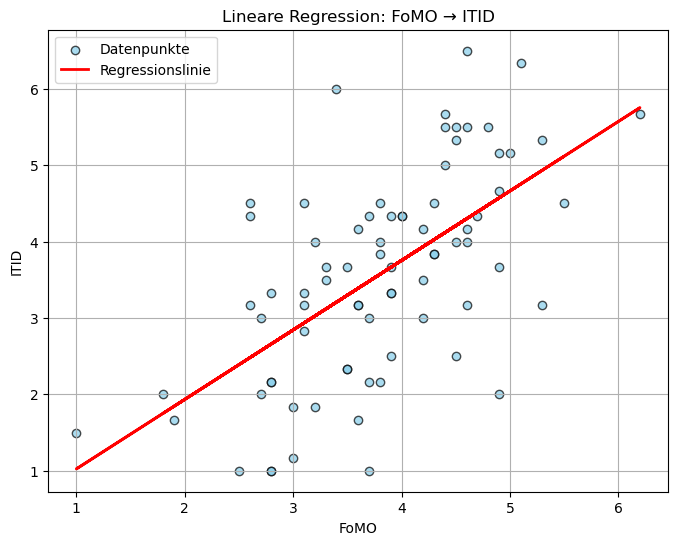

Regressionsformel: ITID = 0.91 * Fomo + 0.11


In [137]:
X = df['Fomo'].values.reshape(-1, 1)
y = df['ITID'].values

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['Fomo'], df['ITID'], alpha=0.7, label='Datenpunkte', color='skyblue', edgecolor='black')
plt.plot(df['Fomo'], y_pred, color='red', linewidth=2, label='Regressionslinie')

plt.xlabel('FoMO')
plt.ylabel('ITID')
plt.title('Lineare Regression: FoMO → ITID')
plt.legend()
plt.grid(True)
plt.savefig('fomo_itid_regression.png', dpi=300, bbox_inches='tight')
plt.show()

#regressionsformal ausgeben
print(f"Regressionsformel: ITID = {model.coef_[0]:.2f} * Fomo + {model.intercept_:.2f}")

SIgnifikanz analyse zur festigung unserer Ergebnisse 

In [138]:
X = df['Fomo']
y = df['ITID']
X = sm.add_constant(X)
modell = sm.OLS(y, X).fit()
print(modell.summary())

                            OLS Regression Results                            
Dep. Variable:                   ITID   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     44.51
Date:                 Sa, 26 Jul 2025   Prob (F-statistic):           3.80e-09
Time:                        18:01:37   Log-Likelihood:                -115.25
No. Observations:                  77   AIC:                             234.5
Df Residuals:                      75   BIC:                             239.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1138      0.533      0.213      0.8

## Analyse das Alters 

Altersverteilung und generelle analyse

Statistische Übersicht zum Alter:
count    77.000000
mean     30.012987
std      12.738765
min      18.000000
25%      22.000000
50%      25.000000
75%      33.000000
max      70.000000
Name: A405_01, dtype: float64

Geschlechtsverteilung:
A404
Weiblich        41
Männlich        35
Keine Angabe     1
Name: count, dtype: int64

Durchschnittsalter: 30.01 Jahre
Alters-Standardabweichung: 12.74



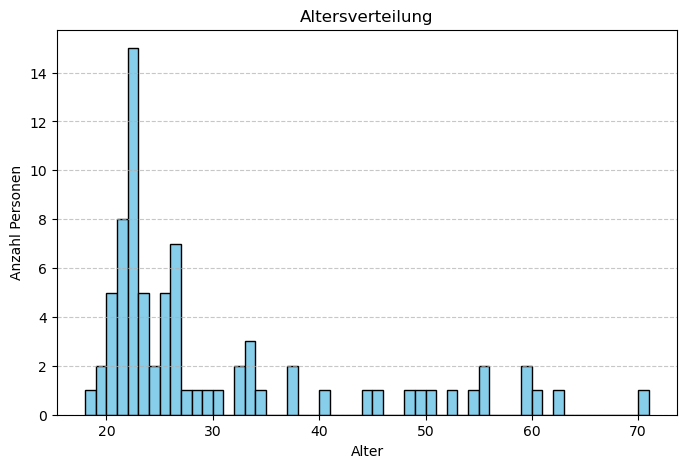


Anzahl fehlender Werte im Alter:
0


In [139]:
alter = df['A405_01']
print("Statistische Übersicht zum Alter:")
print(alter.describe())
print()

geschlechtsverteilung = df['A404'].value_counts().rename(index={1: 'Weiblich', 2: 'Männlich', 3:'Divers', 4:'Keine Angabe'})
print("Geschlechtsverteilung:")
print(geschlechtsverteilung)
print()

# Durchschnittsalter (falls A405_01 das Alter ist)
if 'A405_01' in df.columns:
    print(f"Durchschnittsalter: {df['A405_01'].mean():.2f} Jahre")
    print(f"Alters-Standardabweichung: {df['A405_01'].std():.2f}")
    print()


import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(alter.dropna(), bins=range(int(alter.min()), int(alter.max()) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Alter')
plt.ylabel('Anzahl Personen')
plt.title('Altersverteilung')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('altersverteilung.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Anzahl fehlender Werte
print("\nAnzahl fehlender Werte im Alter:")
print(alter.isna().sum())

Durchführung von Equal-Frequency-Binning zur Erstellung der Alterklassen

In [140]:
num_bins = 4
df['Alter_Quantilgruppe'] = pd.qcut(df['A405_01'], q=num_bins, labels=[f'Q{i+1}' for i in range(num_bins)])
bin_info = pd.qcut(df['A405_01'], q=num_bins)
print(bin_info.value_counts().sort_index())

A405_01
(17.999, 22.0]    31
(22.0, 25.0]      12
(25.0, 33.0]      16
(33.0, 70.0]      18
Name: count, dtype: int64


Erstellung der Regressionsgeraden zwischen FOMO und ITID in Abhängigkeit von Den eben Erstellten Altersklassen

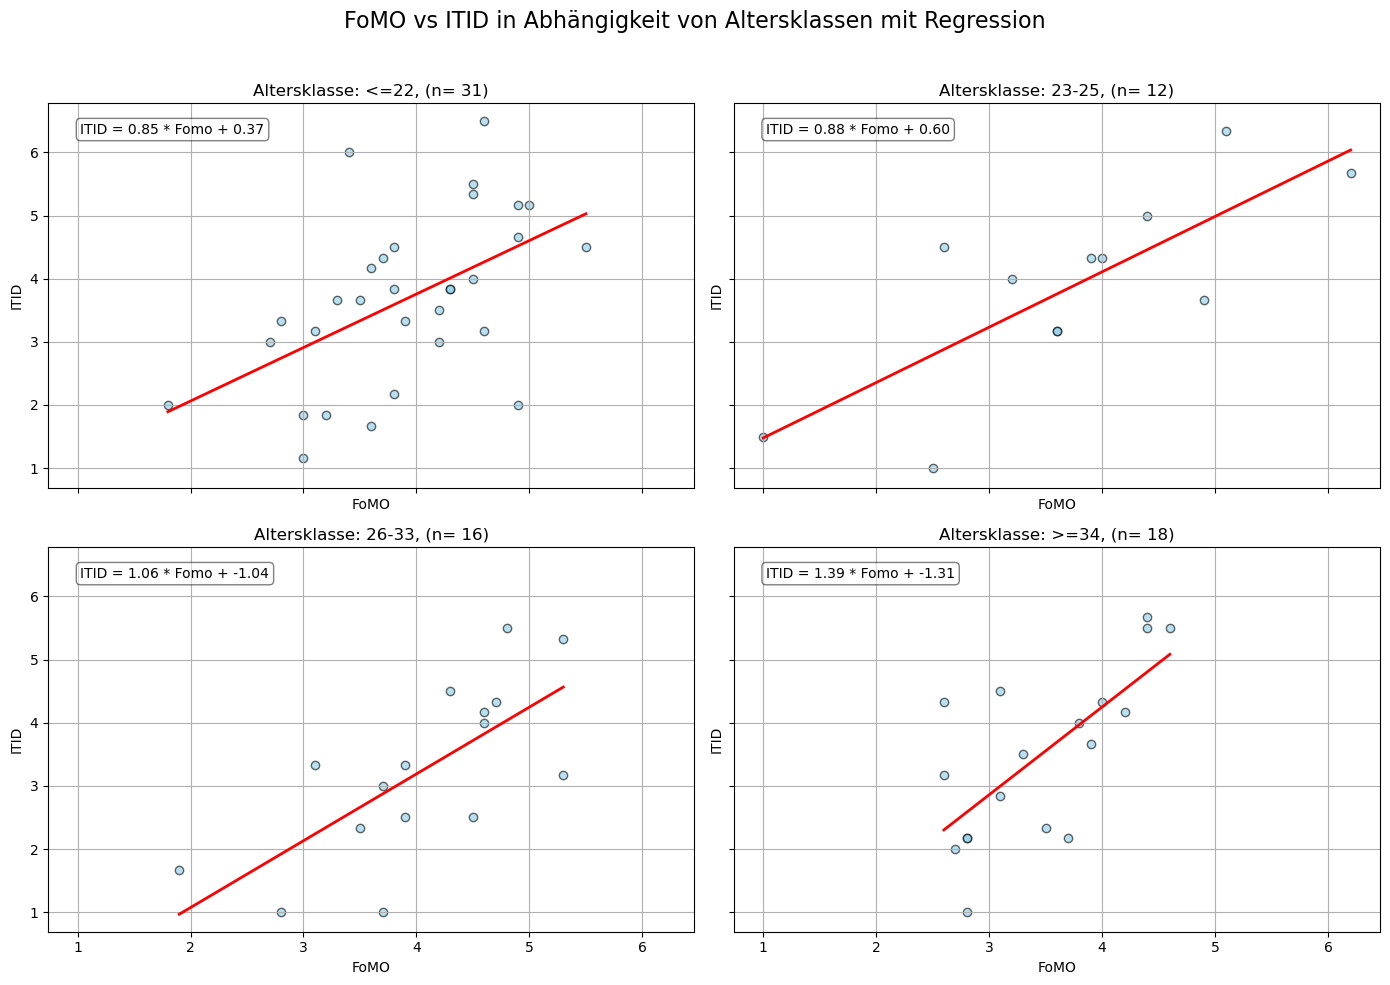

In [141]:
bins = [0, 23, 26, 34, 100]
labels = ['<=22', '23-25', '26-33', '>=34']
df['Alter_Klasse'] = pd.cut(df['A405_01'], bins=bins, labels=labels, right=False)

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, alter_gruppe in enumerate(labels):
    subset = df[df['Alter_Klasse'] == alter_gruppe]
    n = len(subset)
    X = subset['Fomo'].values.reshape(-1, 1)
    y = subset['ITID'].values

    if n > 1:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        axs[i].scatter(subset['Fomo'], subset['ITID'], alpha=0.6, color='skyblue', edgecolor='black')
        sort_idx = np.argsort(X.flatten())
        axs[i].plot(X.flatten()[sort_idx], y_pred[sort_idx], color='red', linewidth=2)

        eq_text = f'ITID = {model.coef_[0]:.2f} * Fomo + {model.intercept_:.2f}'
        axs[i].text(0.05, 0.95, eq_text, transform=axs[i].transAxes,
                    fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


    axs[i].set_title(f'Altersklasse: {alter_gruppe}, (n= {n})')
    axs[i].set_xlabel('FoMO')
    axs[i].set_ylabel('ITID')
    axs[i].grid(True)

plt.suptitle('FoMO vs ITID in Abhängigkeit von Altersklassen mit Regression', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('fomo_itid_alter_regression.png', dpi=300, bbox_inches='tight')
plt.show()


Signifikanzanalyse in Abhängigkeit zu den Altersklassen

In [142]:
df['Alter_Klasse'] = pd.cut(df['A405_01'], bins=bins, labels=labels, right=False)

for gruppe in labels:
    subset = df[df['Alter_Klasse'] == gruppe]
    n = len(subset)
    print(f'\nAltersklasse {gruppe} (n={n}):')
    X = sm.add_constant(subset['Fomo']) 
    y = subset['ITID']

    model = sm.OLS(y, X).fit()
    print(model.summary())


Altersklasse <=22 (n=31):
                            OLS Regression Results                            
Dep. Variable:                   ITID   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     10.67
Date:                 Sa, 26 Jul 2025   Prob (F-statistic):            0.00279
Time:                        18:01:38   Log-Likelihood:                -47.675
No. Observations:                  31   AIC:                             99.35
Df Residuals:                      29   BIC:                             102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3672    

c:\Users\49170\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\49170\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\49170\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [143]:
df['Altersgruppe'] = pd.qcut(df['A405_01'], q=4, labels=['<23', '23-25', '26-33', '34+'])
model = ols('ITID ~ Fomo * Altersgruppe', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                      sum_sq    df          F        PR(>F)
Altersgruppe        7.812510   3.0   2.241243  9.118029e-02
Fomo               57.718742   1.0  49.674847  1.088542e-09
Fomo:Altersgruppe   1.979812   3.0   0.567966  6.379793e-01
Residual           80.173235  69.0        NaN           NaN


## Analyse der Geschlechter 

Generelle Analyse zu den Geschlechtern

Häufigkeit der Geschlechter:
A404
1    41
2    35
4     1
Name: count, dtype: int64

Prozentuale Verteilung:
A404
1    53.246753
2    45.454545
4     1.298701
Name: proportion, dtype: float64


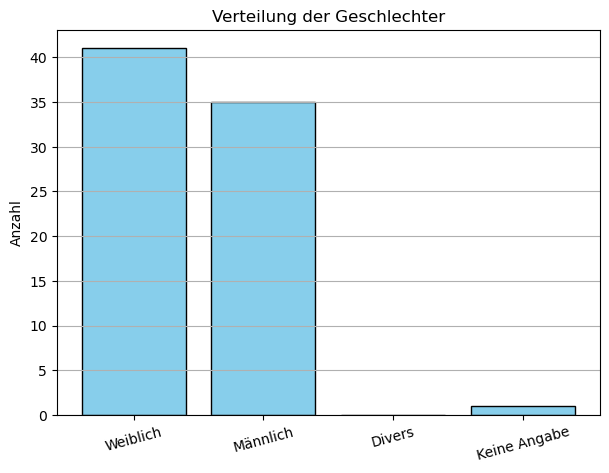

In [144]:
geschlecht = df['A404']

print("Häufigkeit der Geschlechter:")
print(geschlecht.value_counts().sort_index())
print("\nProzentuale Verteilung:")
print(geschlecht.value_counts(normalize=True).sort_index() * 100)

labels = ['Weiblich', 'Männlich', 'Divers', 'Keine Angabe']
counts = [geschlecht.value_counts().get(i, 0) for i in range(1,5)]

plt.figure(figsize=(7,5))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.title('Verteilung der Geschlechter')
plt.ylabel('Anzahl')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.savefig('geschlechterverteilung.png', dpi=300, bbox_inches='tight')
plt.show()


Geschlechter in Beziehung zu FoMO (Ohne 4: Keine Angabe da eine Person nicht für eine Analyyse reicht)

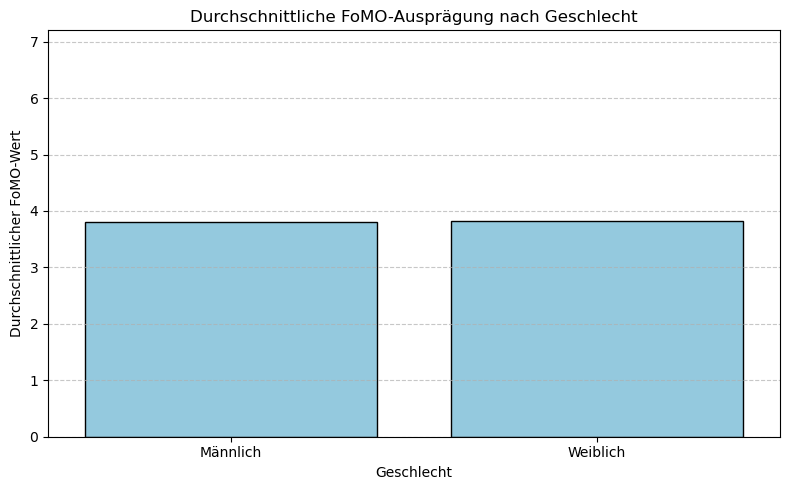

In [145]:
df_gender = df[df['A404'].isin([1, 2])].copy()
df_gender['Geschlecht'] = df_gender['A404'].map({1: 'Weiblich', 2: 'Männlich'})
fomo_means = df_gender.groupby('Geschlecht')['Fomo'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=fomo_means, x='Geschlecht', y='Fomo', palette=['skyblue', 'skyblue'],edgecolor='black')
plt.title('Durchschnittliche FoMO-Ausprägung nach Geschlecht')
plt.ylabel('Durchschnittlicher FoMO-Wert')
plt.xlabel('Geschlecht')
plt.ylim(0, df_gender['Fomo'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('geschlechter_fomo.png', dpi=300, bbox_inches='tight')

plt.show()

In [146]:
fomo_means

,Geschlecht,Fomo
0,Männlich,3.805714
1,Weiblich,3.817073


Signifikanzanalyse Geschlechter zu FoMO

In [147]:
df_gender = df[df['A404'].isin([1, 2])].copy()
df_gender['weiblich'] = (df_gender['A404'] == 1).astype(int)
X = sm.add_constant(df_gender['weiblich'])
y = df_gender['Fomo']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fomo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                  0.002817
Date:                 Sa, 26 Jul 2025   Prob (F-statistic):              0.958
Time:                        18:01:39   Log-Likelihood:                -101.31
No. Observations:                  76   AIC:                             206.6
Df Residuals:                      74   BIC:                             211.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8057      0.157     24.211      0.0

Regressionsanalyse Fomo zu ITID in Abhängigkeit zu den Geschlechtern 

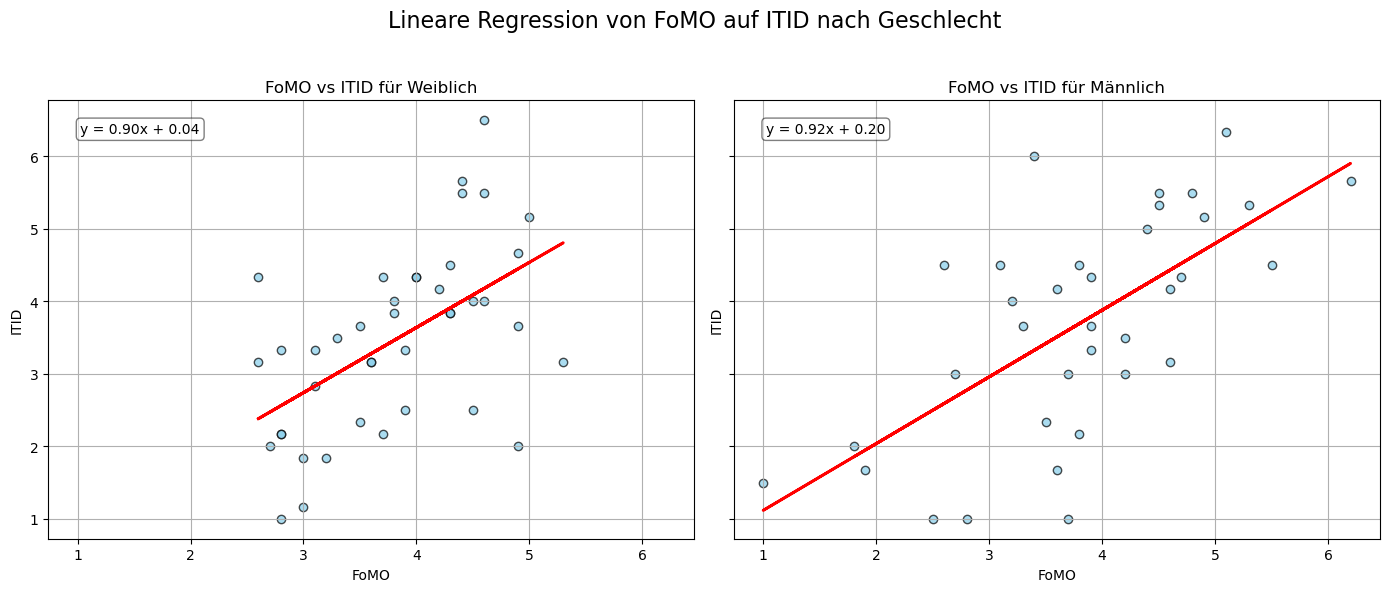

In [155]:
df_gender = df[df['A404'].isin([1, 2])]
geschlechter = {1: 'Weiblich', 2: 'Männlich'}
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

for i, gender_code in enumerate([1, 2]):
    subset = df_gender[df_gender['A404'] == gender_code]
    X = subset['Fomo'].values.reshape(-1, 1)
    y = subset['ITID'].values

    # Regressionsmodell
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Regressionsformel
    a = model.coef_[0]
    b = model.intercept_
    formel = f"y = {a:.2f}x + {b:.2f}"

    # Plotten
    axs[i].scatter(subset['Fomo'], subset['ITID'], alpha=0.7, color='skyblue', edgecolor='black', label='Datenpunkte')
    axs[i].plot(subset['Fomo'], y_pred, color='red', linewidth=2, label='Regressionslinie')
    axs[i].set_title(f'FoMO vs ITID für {geschlechter[gender_code]}')
    axs[i].set_xlabel('FoMO')
    axs[i].set_ylabel('ITID')
    axs[i].grid(True)

    # Formel einfügen
    axs[i].text(0.05, 0.95, formel, transform=axs[i].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Gesamttitel & Ausgabe
plt.suptitle('Lineare Regression von FoMO auf ITID nach Geschlecht', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('fomo_itid_geschlechter_regression_formel.png', dpi=300, bbox_inches='tight')
plt.show()

Signifikanzanalyse FoMO zu ITID in abhänigkeit zu den Geschlechtern 

In [149]:
df_gender = df[df['A404'].isin([1, 2])]
females = df_gender[df_gender['A404'] == 1]
males = df_gender[df_gender['A404'] == 2]

X_f = sm.add_constant(females['Fomo'])
model_f = sm.OLS(females['ITID'], X_f).fit()
print("Weiblich:\n", model_f.summary())

X_m = sm.add_constant(males['Fomo'])
model_m = sm.OLS(males['ITID'], X_m).fit()
print("Männlich:\n", model_m.summary())


Weiblich:
                             OLS Regression Results                            
Dep. Variable:                   ITID   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     16.69
Date:                 Sa, 26 Jul 2025   Prob (F-statistic):           0.000212
Time:                        18:01:40   Log-Likelihood:                -59.545
No. Observations:                  41   AIC:                             123.1
Df Residuals:                      39   BIC:                             126.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0419      0.857      0.0

## Analyse zu der Benachrichtigungshäufigkeit

Genereslle Analyse zu der Häufigkeit

Anzahl Personen pro Kategorie (sortiert):
A301_text
keine    14
1–5      28
6–10     21
10–20     4
20+      10
Name: count, dtype: int64


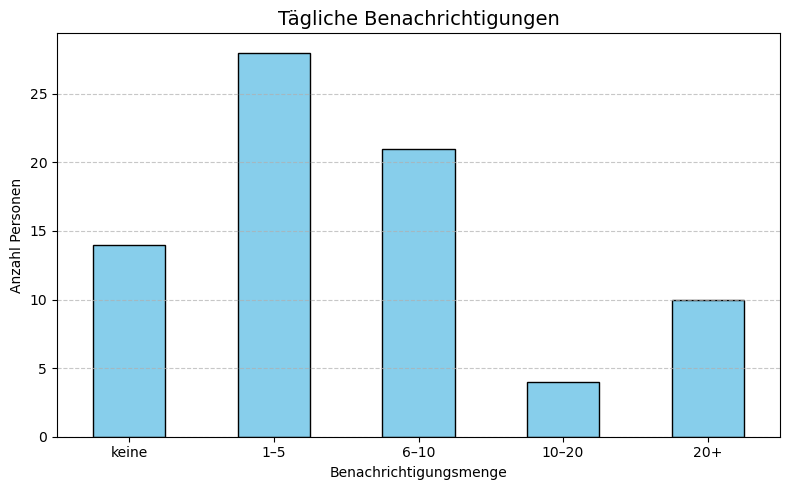

In [150]:
antwort_map = {
    1: '1–5',
    2: '6–10',
    3: '10–20',
    4: 'keine',
    5: '20+'
}

df['A301_text'] = df['A301'].map(antwort_map)
order = ['keine', '1–5', '6–10', '10–20', '20+']
df['A301_text'] = pd.Categorical(df['A301_text'], categories=order, ordered=True)
benachrichtigungen_counts = df['A301_text'].value_counts().sort_index()
print("Anzahl Personen pro Kategorie (sortiert):")
print(benachrichtigungen_counts)

plt.figure(figsize=(8,5))
benachrichtigungen_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Tägliche Benachrichtigungen', fontsize=14)
plt.xlabel('Benachrichtigungsmenge')
plt.ylabel('Anzahl Personen')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('benachrichtigungsverteilung.png', dpi=300, bbox_inches='tight')
plt.show()


Analyse der Durchschnittlichen FoMO und ITID-Werte in Bezug zu der täglichen Benachrichtigungsanzahl

C:\Users\49170\AppData\Local\Temp\ipykernel_10824\4280606025.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gruppen_mittelwerte = df.groupby('A301_text')[['Fomo', 'ITID']].mean().reindex(order)


Durchschnittswerte pro Gruppe:
           Fomo  ITID
A301_text            
keine      3.69  3.21
1–5        3.51  2.88
6–10       4.16  4.25
10–20      3.55  4.54
20+        4.15  4.22

Anzahl pro Gruppe:
A301_text
keine    14
1–5      28
6–10     21
10–20     4
20+      10
Name: count, dtype: int64


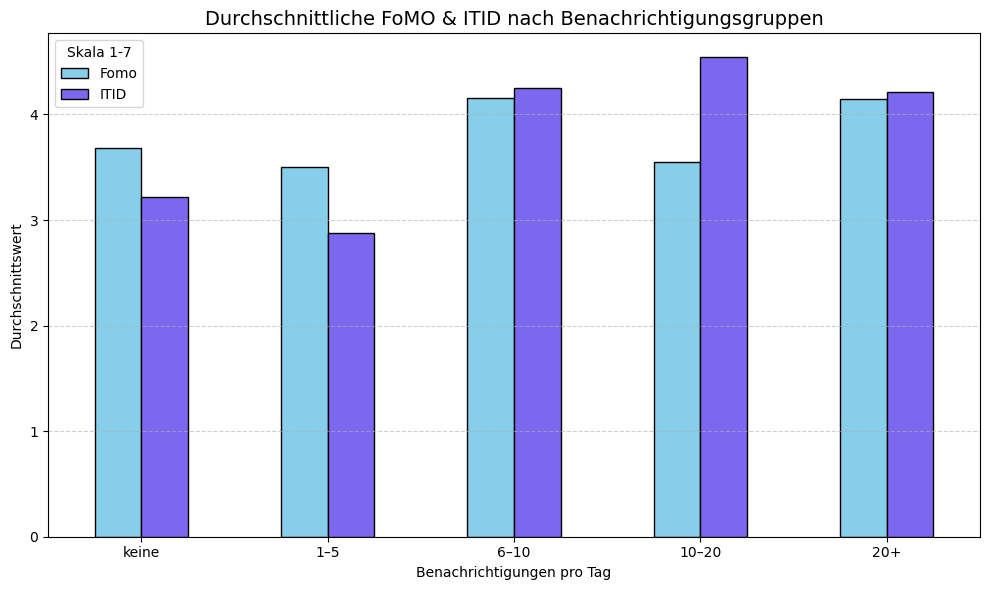

In [151]:
gruppen_mittelwerte = df.groupby('A301_text')[['Fomo', 'ITID']].mean().reindex(order)
gruppen_counts = df['A301_text'].value_counts().reindex(order)

print("Durchschnittswerte pro Gruppe:")
print(gruppen_mittelwerte.round(2))
print("\nAnzahl pro Gruppe:")
print(gruppen_counts)

gruppen_mittelwerte.plot(kind='bar', figsize=(10,6), color=['skyblue', 'mediumslateblue'], edgecolor='black')
plt.title('Durchschnittliche FoMO & ITID nach Benachrichtigungsgruppen', fontsize=14)
plt.xlabel('Benachrichtigungen pro Tag')
plt.ylabel('Durchschnittswert')
plt.xticks(rotation=0)
plt.legend(title='Skala 1-7')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('fomo_itid_benachrichtigungen.png', dpi=300, bbox_inches='tight')
plt.show()

RegressionsAnalyse Fomo zu ITID in Abhänigkeit zu den täglichen Benachrichtigungen

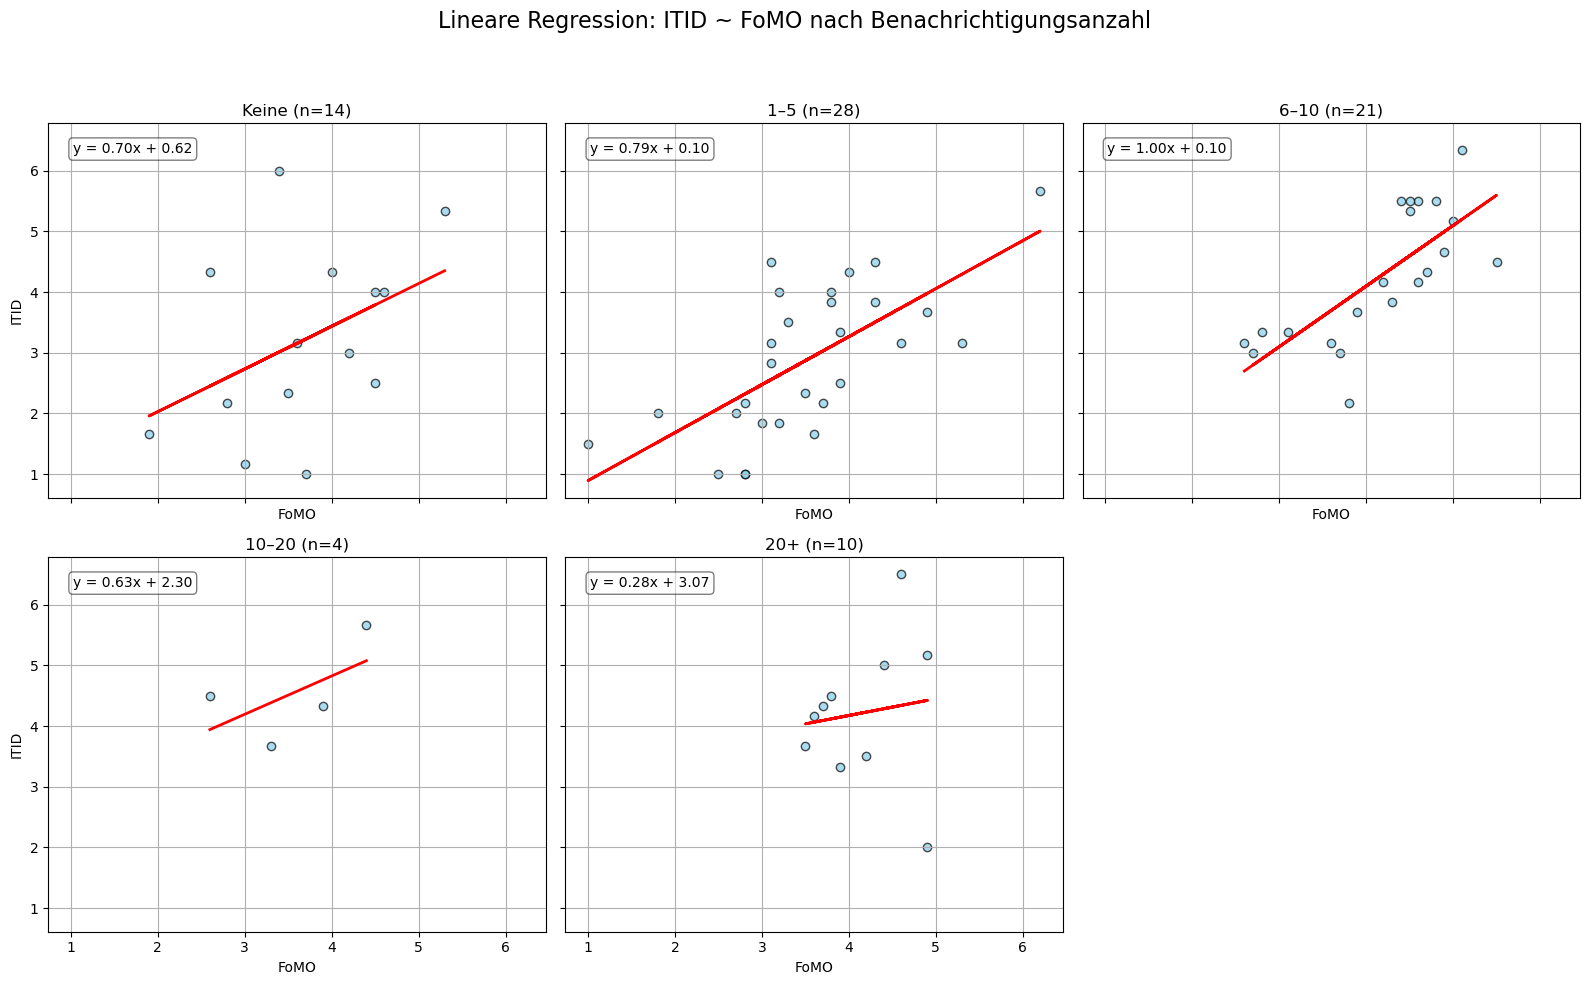

In [152]:
benachrichtigungen_map = {
    4: 'Keine',
    1: '1–5', 
    2: '6–10',
    3: '10–20',
    5: '20+'
}
sortierte_labels = ['Keine', '1–5', '6–10', '10–20', '20+']

df_notif = df[df['A301'].isin(benachrichtigungen_map.keys())].copy()
df_notif['Benachrichtigung'] = df_notif['A301'].map(benachrichtigungen_map)
df_notif['Benachrichtigung'] = pd.Categorical(df_notif['Benachrichtigung'], categories=sortierte_labels, ordered=True)
fig, axs = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, gruppe in enumerate(sortierte_labels):
    subset = df_notif[df_notif['Benachrichtigung'] == gruppe]
    n = len(subset)
    X = subset['Fomo'].values.reshape(-1, 1)
    y = subset['ITID'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    a = model.coef_[0]
    b = model.intercept_
    formel = f"y = {a:.2f}x + {b:.2f}"

    
    axs[i].scatter(subset['Fomo'], subset['ITID'], alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].plot(subset['Fomo'], y_pred, color='red', linewidth=2)
    axs[i].set_title(f"{gruppe} (n={n})")
    axs[i].set_xlabel('FoMO')
    if i % 3 == 0:
        axs[i].set_ylabel('ITID')
    axs[i].grid(True)
    axs[i].text(0.05, 0.95, formel, transform=axs[i].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

if len(sortierte_labels) < len(axs):
    for j in range(len(sortierte_labels), len(axs)):
        fig.delaxes(axs[j])

plt.suptitle('Lineare Regression: ITID ~ FoMO nach Benachrichtigungsanzahl', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig('fomo_itid_benachrichtigungen_regression_formeln.png', dpi=300, bbox_inches='tight')
plt.show()

Siginifikanzanalyse Von Fomo zu ITID in Anhänigkeit von den Täglichen Benachrichtigungen 

In [153]:
for gruppe in sortierte_labels:
    subset = df_notif[df_notif['Benachrichtigung'] == gruppe]
    X = sm.add_constant(subset['Fomo'])
    y = subset['ITID']
    model = sm.OLS(y, X).fit()
    print(f"\n Gruppe: {gruppe} (n={n})")
    print(model.summary())


 Gruppe: Keine (n=10)
                            OLS Regression Results                            
Dep. Variable:                   ITID   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.640
Date:                 Sa, 26 Jul 2025   Prob (F-statistic):              0.130
Time:                        18:01:43   Log-Likelihood:                -23.788
No. Observations:                  14   AIC:                             51.58
Df Residuals:                      12   BIC:                             52.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6189      1.

c:\Users\49170\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\49170\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\49170\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Analyse zu der Beschäftigung 

generelle Analyse zu der Okkupation unserer Teilnehmer

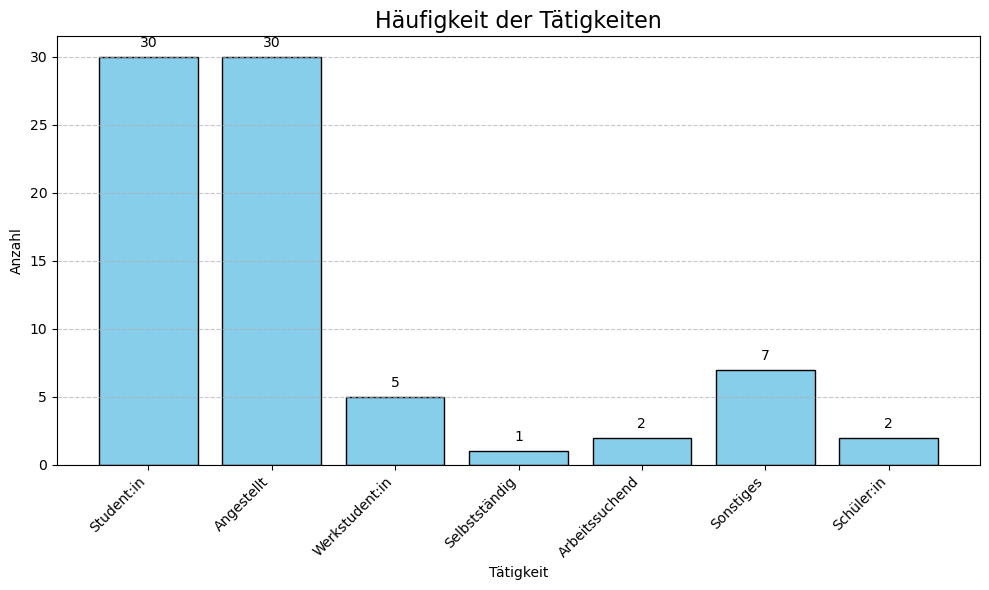

In [154]:
tätigkeiten_map = {
    1: 'Student:in',
    2: 'Angestellt',
    3: 'Werkstudent:in',
    4: 'Selbstständig',
    5: 'Arbeitssuchend',
    6: 'Sonstiges',
    7: 'Schüler:in'
}

df['Tätigkeit'] = df['A403'].map(tätigkeiten_map)
tätigkeit_counts = df['Tätigkeit'].value_counts().reindex(tätigkeiten_map.values(), fill_value=0)

plt.figure(figsize=(10, 6))
bars = plt.bar(tätigkeit_counts.index, tätigkeit_counts.values, color='skyblue', edgecolor='black')
plt.title('Häufigkeit der Tätigkeiten', fontsize=16)
plt.xlabel('Tätigkeit')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig("tätigkeiten_verteilung.png", dpi=300, bbox_inches='tight')
plt.show()